<a href="https://colab.research.google.com/github/nirmal102002/project/blob/main/cricketscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
#reading the dataset
dataset=pd.read_csv('/content/t20.csv')


In [ ]:
#display of dataset
print(dataset.head())

   mid        date          venue bat_team  bowl_team         batsman bowler  \
0    1  2005-06-13  The Rose Bowl  England  Australia  ME Trescothick  B Lee   
1    1  2005-06-13  The Rose Bowl  England  Australia  ME Trescothick  B Lee   
2    1  2005-06-13  The Rose Bowl  England  Australia        GO Jones  B Lee   
3    1  2005-06-13  The Rose Bowl  England  Australia        GO Jones  B Lee   
4    1  2005-06-13  The Rose Bowl  England  Australia        GO Jones  B Lee   

   runs  wickets  overs  runs_last_5  wickets_last_5  striker  non-striker  \
0     0        0    0.1            0               0        0            0   
1     1        0    0.2            1               0        1            0   
2     1        0    0.3            1               0        1            0   
3     1        0    0.4            1               0        1            0   
4     1        0    0.5            1               0        1            0   

   total  
0    179  
1    179  
2    179  
3    1

In [ ]:
#separating the target and feature variables

feature_columns = ['runs', 'wickets', 'overs', 'runs_last_5', 'striker', 'non-striker']
X = dataset[feature_columns].values
y = dataset['total'].values



In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create the DecisionTreeRegressor object
reg = DecisionTreeRegressor()

# Fit the model to the training data
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Testing the dataset on trained model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)*100
print("R square value:" , score)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


R square value: 45.046849422165245
Mean Squared Error (MSE): 509.4636919200887


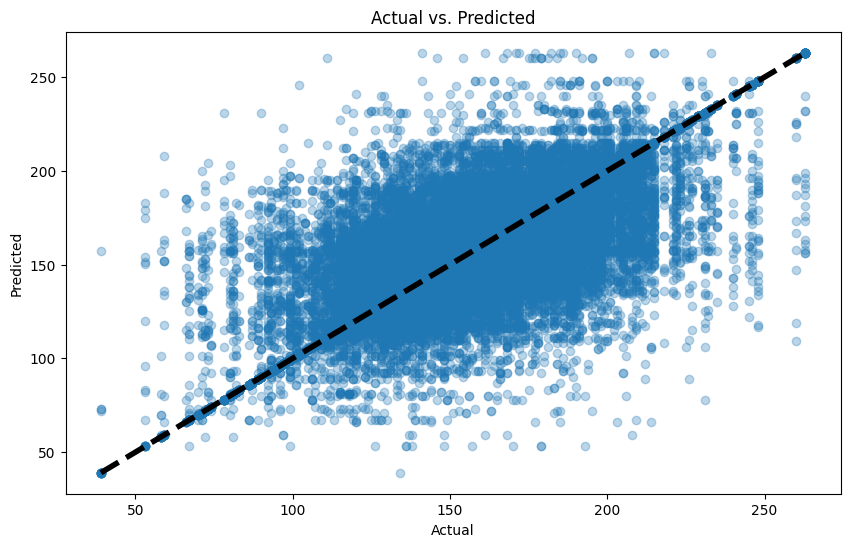

In [ ]:
import matplotlib.pyplot as plt
# Visualization of the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())], [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())], 'k--', lw=4)  # Identity line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [ ]:
#making of the predictive system
x=int(input("enter current score"))
y=int(input("enter number of wickets "))
z=int(input("enter total overs finished"))
w=int(input("enter no of runs scored in five overs"))

new_prediction = reg.predict(sc.transform(np.array([[x,y,z,w,60,40]])))
print("Prediction score:" , new_prediction)

enter current score100
enter number of wickets 0
enter total overs finished9
enter no of runs scored in five overs60
Prediction score: [222.]
